In [2]:
from PlayerCounter import CountPlayers
totalPlayers = CountPlayers()
print(totalPlayers)

11080


c:\Users\Darragh\Desktop\Programming\Year 4\Game Analytics\GA_25_P1_Part3_Darragh_McKernan\DailyActiveUsers.py:4: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  dailyLogins = pd.read_csv("C:\\Users\\Darragh\\Desktop\\Programming\\Year 4\\Game Analytics\\GA_25_P1_Part3_Darragh_McKernan\\data\\player_logged_in.csv",parse_dates=["Time"],dayfirst=True)


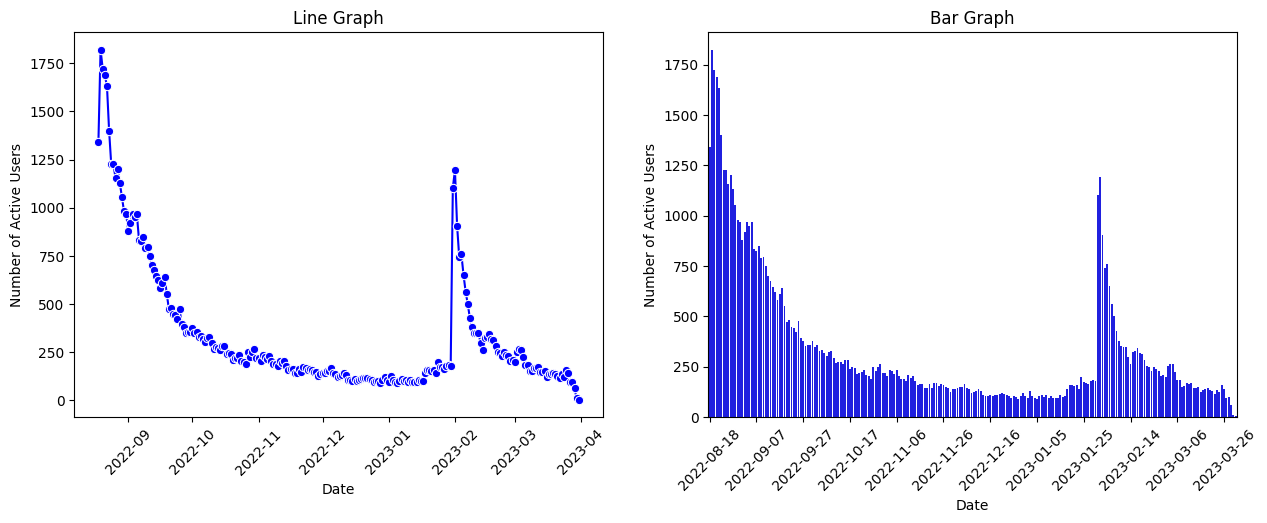

In [3]:
from DailyActiveUsers import GetDailyActiveUsers
import matplotlib.pyplot as plt
import seaborn as sns

dailyUsers = GetDailyActiveUsers()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.lineplot(data=dailyUsers, x="Date", y="DAU", marker="o", color="b")
plt.title("Line Graph")
plt.xlabel("Date")
plt.ylabel("Number of Active Users")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(data=dailyUsers, x="Date", y="DAU", color="blue")
plt.title("Bar Graph")
plt.xlabel("Date")
plt.ylabel("Number of Active Users")
plt.xticks(ticks=range(0, len(dailyUsers), 20), labels=dailyUsers['Date'][::20], rotation=45)

plt.show()

c:\Users\Darragh\Desktop\Programming\Year 4\Game Analytics\GA_25_P1_Part3_Darragh_McKernan\MonthlyActiveUsers.py:4: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  monthlyLogins = pd.read_csv("C:\\Users\\Darragh\\Desktop\\Programming\\Year 4\\Game Analytics\\GA_25_P1_Part3_Darragh_McKernan\\data\\player_logged_in.csv",parse_dates=["Time"],dayfirst=True)


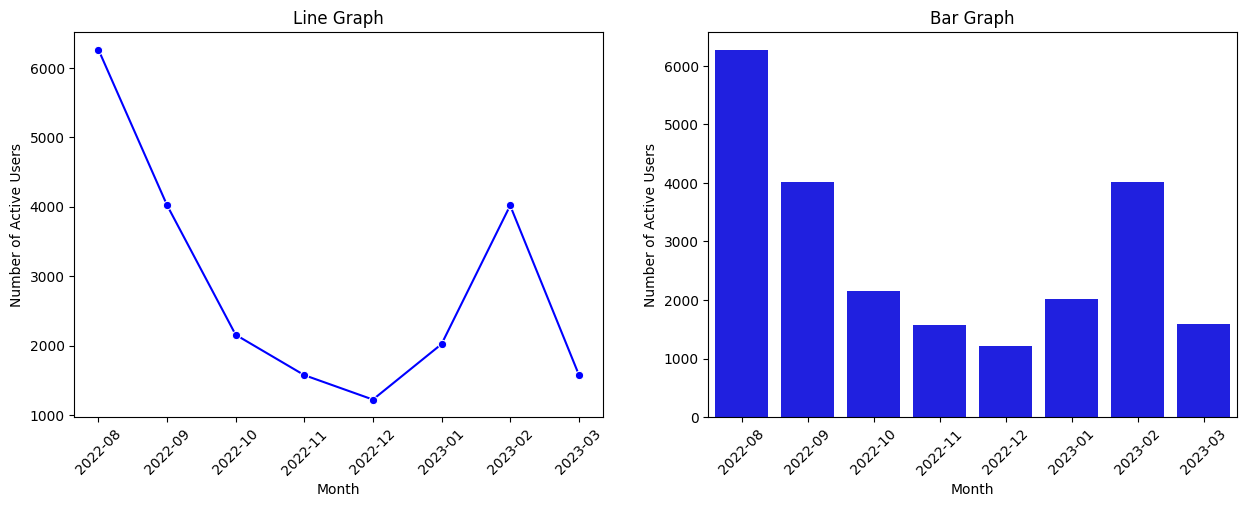

In [2]:
from MonthlyActiveUsers import GetMonthlyActiveUsers
import matplotlib.pyplot as plt
import seaborn as sns

monthlyUsers = GetMonthlyActiveUsers()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.lineplot(data=monthlyUsers, x="Month", y="MAU", marker="o", color="b")
plt.title("Line Graph")
plt.xlabel("Month")
plt.ylabel("Number of Active Users")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(data=monthlyUsers, x="Month", y="MAU", color="blue")
plt.title("Bar Graph")
plt.xlabel("Month")
plt.ylabel("Number of Active Users")
plt.xticks(rotation=45)

plt.show()

c:\Users\Darragh\Desktop\Programming\Year 4\Game Analytics\GA_25_P1_Part3_Darragh_McKernan\MonthlyActiveUsers.py:4: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  monthlyLogins = pd.read_csv("C:\\Users\\Darragh\\Desktop\\Programming\\Year 4\\Game Analytics\\GA_25_P1_Part3_Darragh_McKernan\\data\\player_logged_in.csv",parse_dates=["Time"],dayfirst=True)
c:\Users\Darragh\Desktop\Programming\Year 4\Game Analytics\GA_25_P1_Part3_Darragh_McKernan\DailyActiveUsers.py:4: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  dailyLogins = pd.read_csv("C:\\Users\\Darragh\\Desktop\\Programming\\Year 4\\Game Analytics\\GA_25_P1_Part3_Darragh_McKernan\\data\\player_logged_in.csv",parse_dates=["Time"],dayfirst=True)


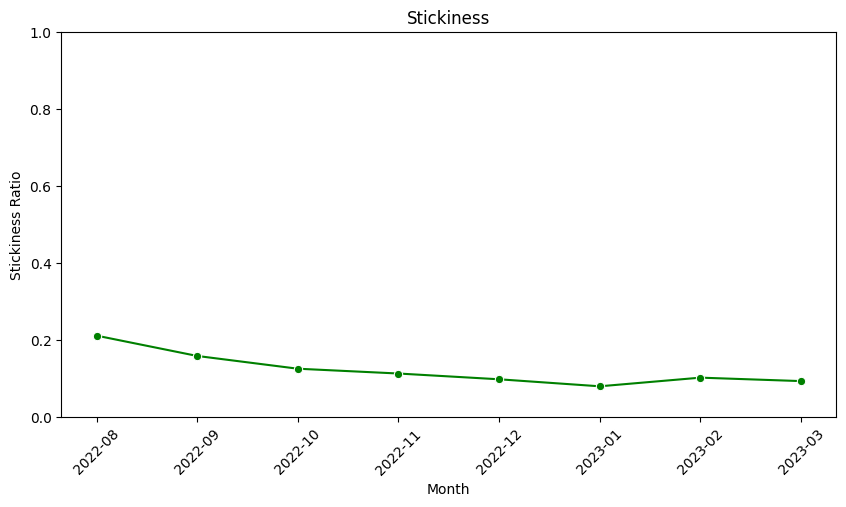

In [ ]:
from MonthlyActiveUsers import GetMonthlyActiveUsers
from DailyActiveUsers import GetDailyActiveUsers
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

monthlyUsers = GetMonthlyActiveUsers()
dailyUsers = GetDailyActiveUsers()

dailyUsers["Month"] = pd.to_datetime(dailyUsers["Date"]).dt.to_period("M").astype(str)
monthlyDAU = dailyUsers.groupby("Month")["DAU"].mean().reset_index()
stickiness = pd.merge(monthlyDAU, monthlyUsers, on="Month")
stickiness["Stickiness"] = stickiness["DAU"] / stickiness["MAU"]

plt.figure(figsize=(10, 5))
sns.lineplot(data=stickiness, x="Month", y="Stickiness", marker="o", color="g")
plt.title("Stickiness")
plt.xlabel("Month")
plt.ylabel("Stickiness Ratio")
plt.xticks(rotation=45)
plt.ylim(0, 1)

plt.show()

### Reflection
#### The graph shows that the amount of times per month that players are returning slowly decreases over time but there is a noticable bump in February of 2023. This is more than likely due to the release of a DLC as PowerWash Sim had several free and premium DLCs that added new levels to the game which could draw back existing players and bring in new players. 